# BEST PRACTICES HANDBOOK
## Problems affecting modelling of time series
* Skewness
* Multicollinearity
* Sensitivity to outliers

# Definitions
## Skewness

    Pearson’s median skewness = 

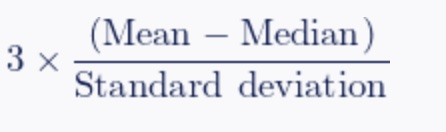

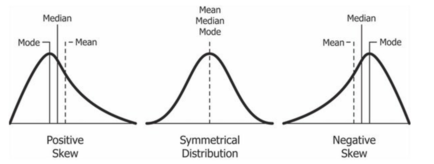

## Multicollinearity

Correlation between independent variables in a regression equation
    
Coefficients of multiple determination =
* Remove the dependent variable from the regression equation
* Use each independent variable k to run a regression where the kth variable is the dependent variable
* If R2k >0.75 there is a multicollinearity issue.

Variance inflation Factor =

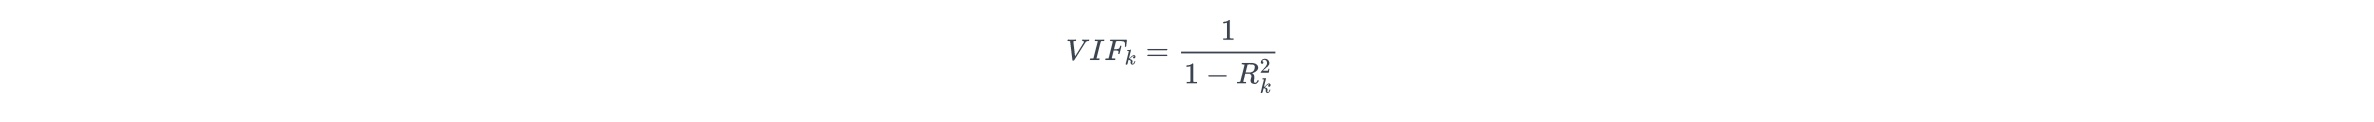

## Overfitting

In econometrics, overfitting is a phenomenon in which a predictive model fits the training data too closely. This can result in the model performing poorly on new data. The term "overfitting" is often used to mean that the complexity of a model has exceeded its ability to generalize.

The problem of overfitting occurs when we try to fit parameters to data by minimizing the sum of squared errors (SSE).

This process leads to models that are too complex for our data and, as a consequence, perform poorly on new data.

# Description
## Skewness

The skewness in statistics refers to the asymmetry of a distribution. It can be either positive or negative and it is represented by a graph as either a "skew to the right" or "skew to the left."

The skewness in statistics is a measure of how far away from normal something is. We can identify the skewness by looking at how the data is distributed in relation to the mean, median, and mode. The closer it gets to normal, the less skewed it will be.

A distribution with more values on one side than another side is called positively skewed. A distribution with more values on one side than another side is called negatively skewed. A distribution with a skewness of zero is said to be symmetric

## Multicollinearity

Multicollinearity is a phenomenon in which two or more predictor variables are highly correlated with each other. This can lead to inaccurate, and often biased, estimates of the regression coefficients. Multicollinearity can be a problem for regression analysis because it can lead to incorrect estimates of the coefficients and incorrect inferences about the relationships among variables.

Multicollinearity should be checked for before running any regression analyses because it can lead to inaccurate and biased estimates of the regression coefficients.

## Overfitting

Overfitting is a problem that occurs when the model is too closely fitted to the training data and performs poorly on the test data

The problem with overfitting is that it can lead to a model that performs well on the training data, but poorly on new data. This means that the model might not be generalizable and can't be used in practice.

Overfitting happens when there are too many parameters for your data set. This can happen when there are too many features, or if you have a very small sample size.


# Demonstration 
## Skewness

In [22]:
# Load libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import skewnorm

plt.rcParams["figure.figsize"] = (16, 9)  # Figure size and width


In [20]:
# Download the dataset
data_set = pd.read_csv("/Users/Beirut/Documents/AAL.csv")

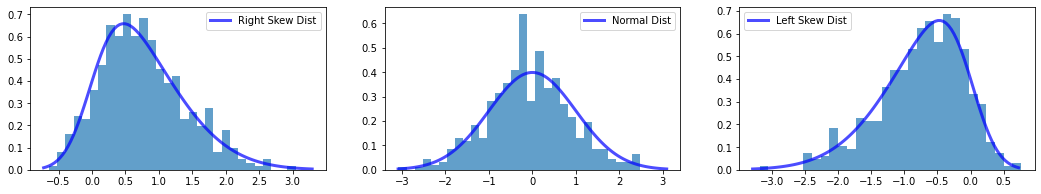

In [19]:
# Histograms of Normal Distribution, Right-Skew and Left-Skew Distributions

# Helper HistogramPlot function
def HistogPlot(a, label):
    # np.random.seed(1234567)
    r = skewnorm.rvs(a, size=500)
    x = np.linspace(skewnorm.ppf(0.001, a), skewnorm.ppf(0.999, a), 100)
    plt.plot(x, skewnorm.pdf(x, a), "b-", lw=3, alpha=0.7, label=label)  # Density
    plt.hist(r, bins=30, density=True, histtype="stepfilled", alpha=0.7)  # Histogram
    plt.legend()


# Plot
plt.figure(figsize=(18, 3))
ax1 = plt.subplot(131)
HistogPlot(3, "Right Skew Dist")  # Right Skew a>0
ax2 = plt.subplot(132)
HistogPlot(0, "Normal Dist")  # Normal Dist. a=0
ax3 = plt.subplot(133)
HistogPlot(-3, "Left Skew Dist")  # Left Skew a<0
plt.show()

# Demonstration 
## Multicollinearity

In [23]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

plt.rcParams["figure.figsize"] = (12, 9)

In [41]:
# Download the dataset
data_set = pd.read_csv("/Users/Beirut/Documents/real world data2.csv")

In [42]:
pd.DataFrame.head(data_set)

,Unnamed: 0,_Year,Quarter,Yr_Qtr,Risk_F_R,Coke_Q_EX_R,Dow_Q_EX_R,Pepsi_Q_EX_R,REV_Q_R,T_Bill_13W_R,...,Pepsi_Q_P,GOOG_Q_EX_R,BAC_Q_EX_R,PFE_Q_EX_R,WMT_Q_EX_R,HD_Q_EX_R,XOM_Q_EX_R,GE_Q_EX_R,SBUX_Q_EX_R,Unnamed: 25
0,1.0,2016.0,2.0,2016_2,0.000600,-0.019248,0.036455,0.065220,0.122252,0.240,...,92.683632,0.108749,-0.002032,0.137289,0.098612,0.037236,0.014078,0.019755,0.035379,NaN
1,2.0,2016.0,3.0,2016_3,0.000737,-0.020989,-0.016461,-0.009568,-0.078516,0.295,...,91.865227,0.019749,0.143278,-0.134009,-0.034597,-0.113616,-0.056043,-0.058955,-0.083342,NaN
2,3.0,2016.0,4.0,2016_4,0.001250,-0.012537,0.093647,-0.025991,-0.115113,0.500,...,89.592361,0.014364,0.375962,0.009360,-0.041272,0.132350,0.014507,0.027050,0.044082,NaN
3,4.0,2017.0,1.0,2017_1,0.001950,0.045220,0.052239,0.097087,-0.030928,0.780,...,98.465363,0.135062,0.032111,0.077961,0.132794,0.139568,-0.019752,-0.018071,0.090601,NaN
4,5.0,2017.0,2.0,2017_2,0.002632,0.068451,0.042763,0.033834,0.064049,1.053,...,102.056030,0.024455,0.034181,-0.015576,0.068467,-0.038735,-0.013094,-0.111772,-0.100162,NaN


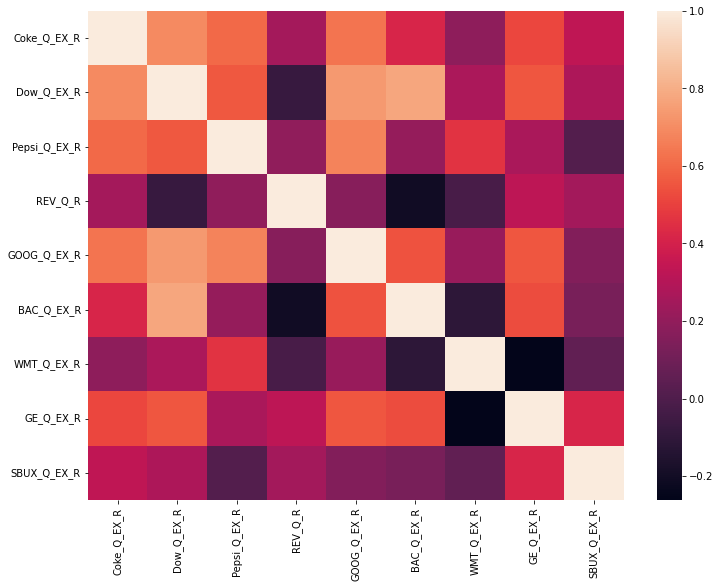

In [45]:
# Correlation plot of all the variables
data = data_set[
    [
        "Coke_Q_EX_R",
        "Dow_Q_EX_R",
        "Pepsi_Q_EX_R",
        "REV_Q_R",
        "GOOG_Q_EX_R",
        "BAC_Q_EX_R",
        "WMT_Q_EX_R",
        "GE_Q_EX_R",
        "SBUX_Q_EX_R",
    ]
]
c = data.corr()
sns.heatmap(c, annot=False)
plt.show()